In [133]:
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report
import warnings
warnings.filterwarnings('ignore')
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [134]:
data=pd.read_csv('WineQT.csv')

In [135]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [136]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [137]:
data.shape

(1143, 13)

In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [139]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [140]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [141]:
data.duplicated().sum()

0

In [142]:
data=data.drop('Id', axis=1)

In [143]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [144]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710


In [145]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

### quantitative distribution of the target variable

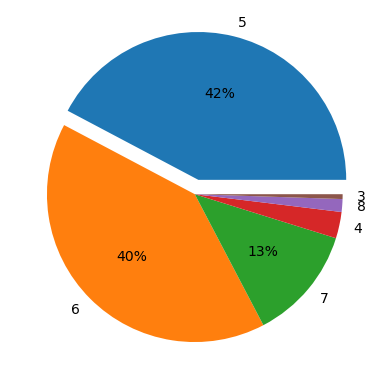

In [146]:
explode = [0.1, 0, 0, 0, 0, 0]
autopct=lambda pct: '{:.0f}%'.format(pct) if pct > 10 else ''
plt.pie(data['quality'].value_counts(), labels=data['quality'].unique(), explode=explode, autopct=autopct)
plt.show()

<AxesSubplot:xlabel='quality', ylabel='count'>

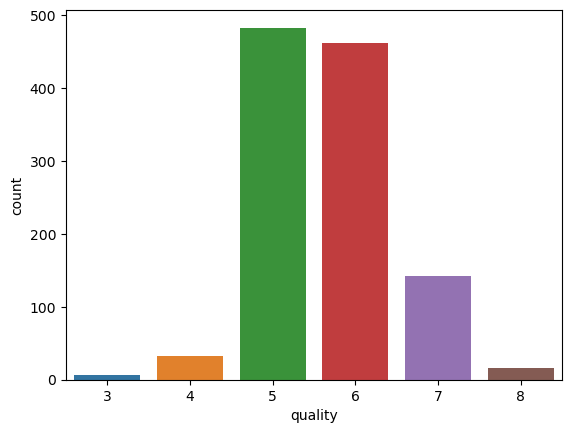

In [147]:
sns.countplot(x=data['quality'])

<AxesSubplot:>

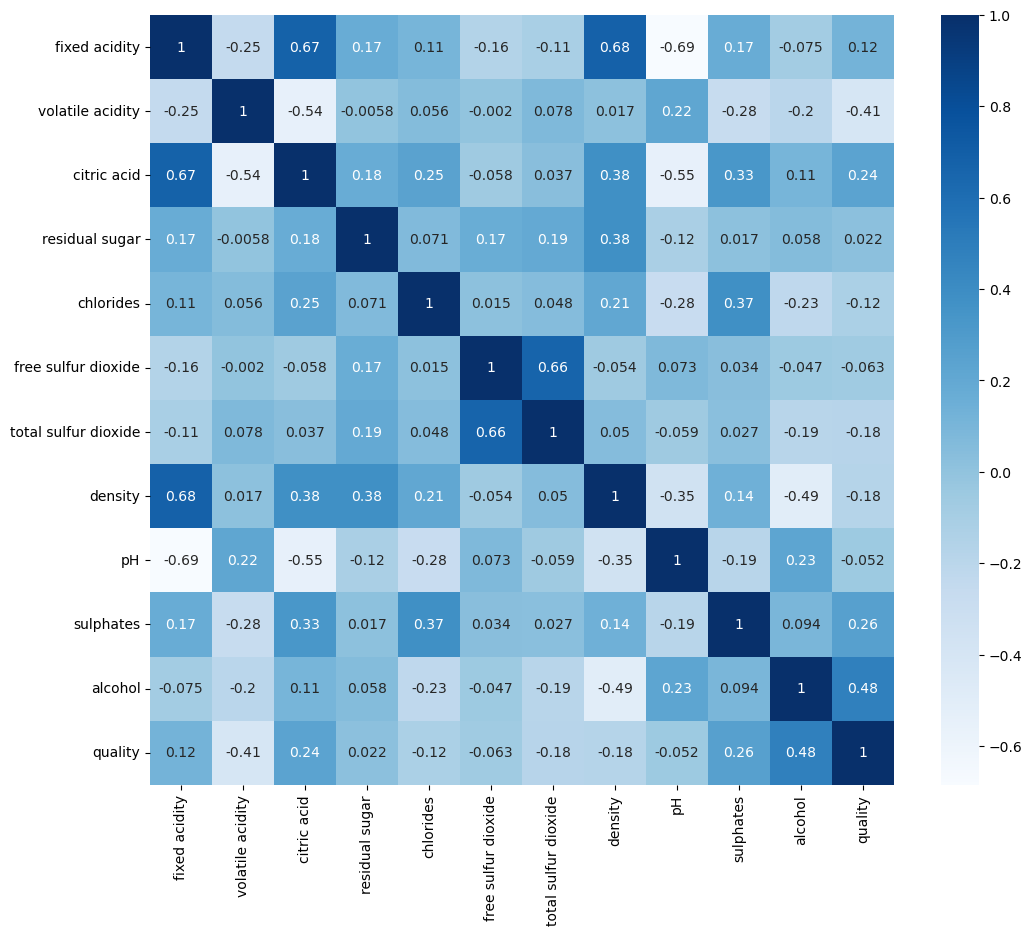

In [148]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap="Blues")

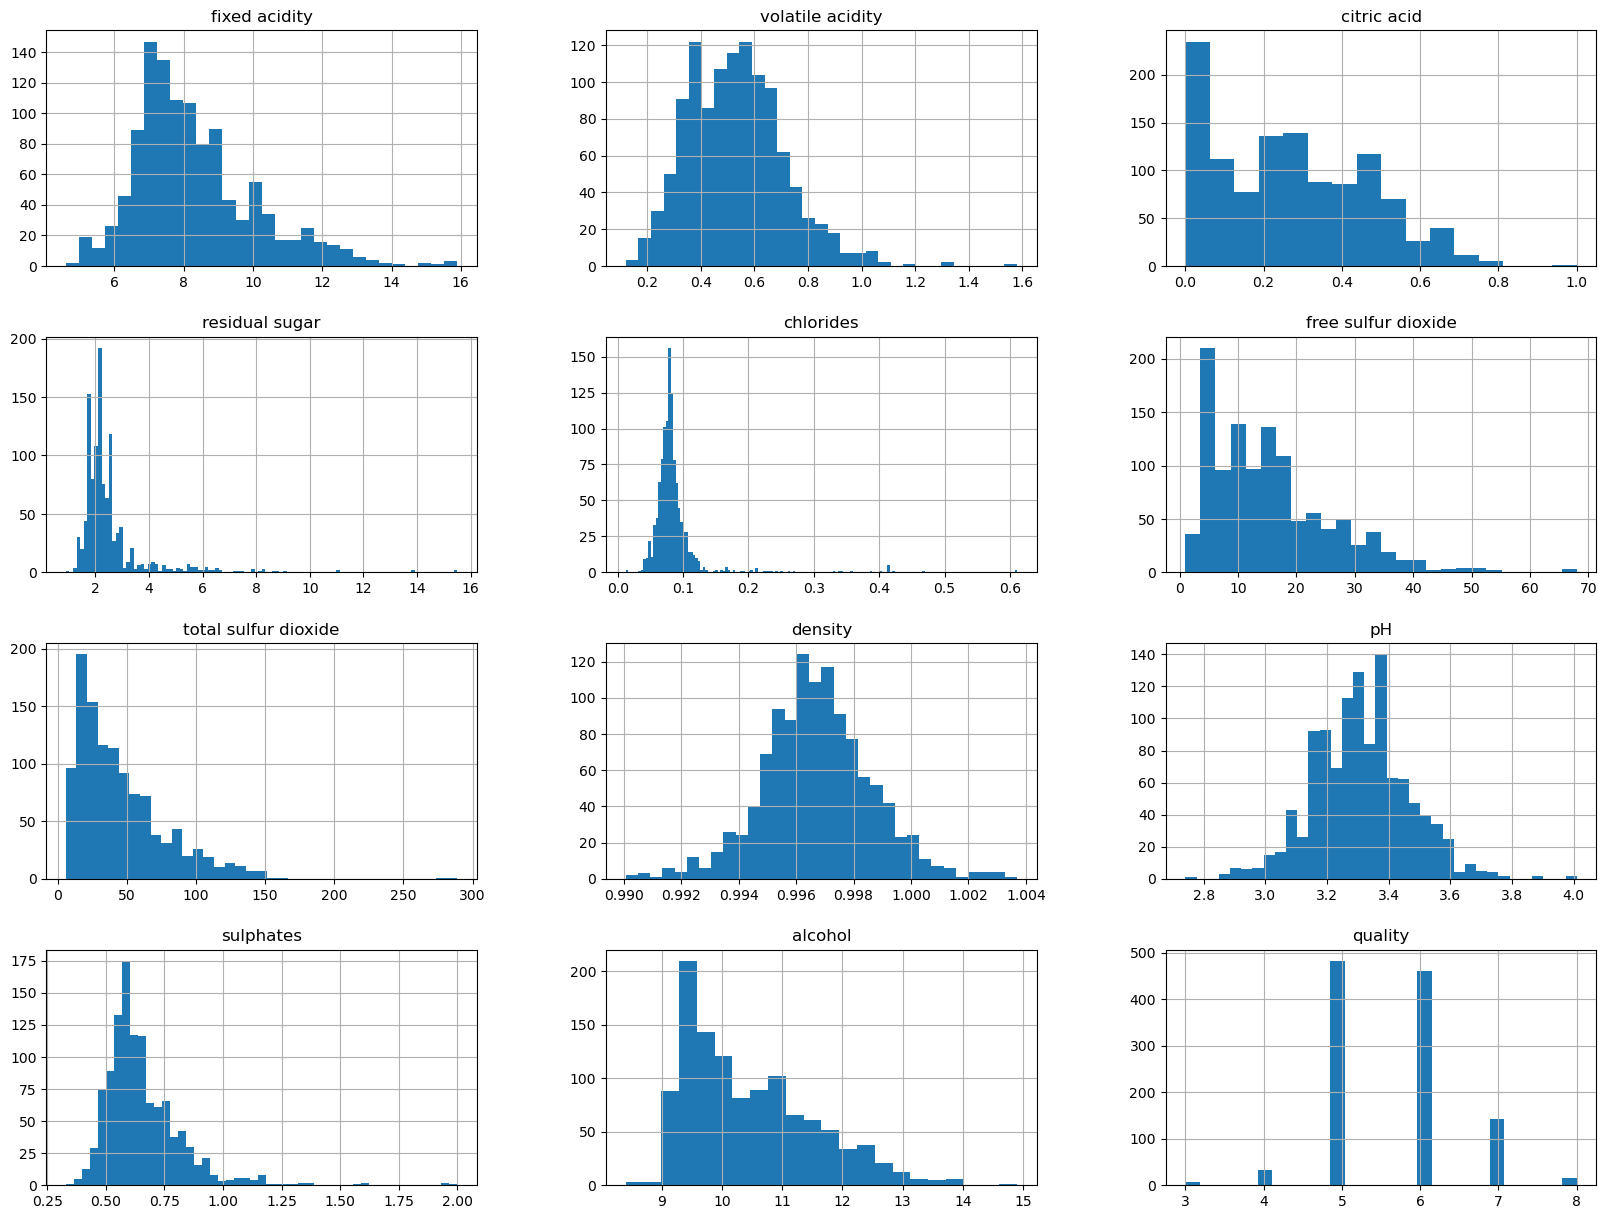

In [149]:
data.hist(figsize=(20,15),bins='auto')
plt.show()

In [150]:
data.skew().sort_values()

density                 0.102395
pH                      0.221138
quality                 0.286792
citric acid             0.371561
volatile acidity        0.681547
alcohol                 0.863313
fixed acidity           1.044930
free sulfur dioxide     1.231261
total sulfur dioxide    1.665766
sulphates               2.497266
residual sugar          4.361096
chlorides               6.026360
dtype: float64

In [151]:
data['fixed acidity']=data['fixed acidity'].apply(np.log)
data['total sulfur dioxide']=data['total sulfur dioxide'].apply(np.log)
data['sulphates']=data['sulphates'].apply(np.log)
data['free sulfur dioxide']=data['free sulfur dioxide'].apply(np.log)
data['chlorides']=data['chlorides'].apply(np.log)
data['residual sugar']=data['residual sugar'].apply(np.log)

In [152]:
data.skew().sort_values()

free sulfur dioxide    -0.237440
total sulfur dioxide   -0.039429
density                 0.102395
pH                      0.221138
quality                 0.286792
citric acid             0.371561
fixed acidity           0.417080
volatile acidity        0.681547
alcohol                 0.863313
sulphates               0.978688
chlorides               1.632336
residual sugar          1.741037
dtype: float64

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

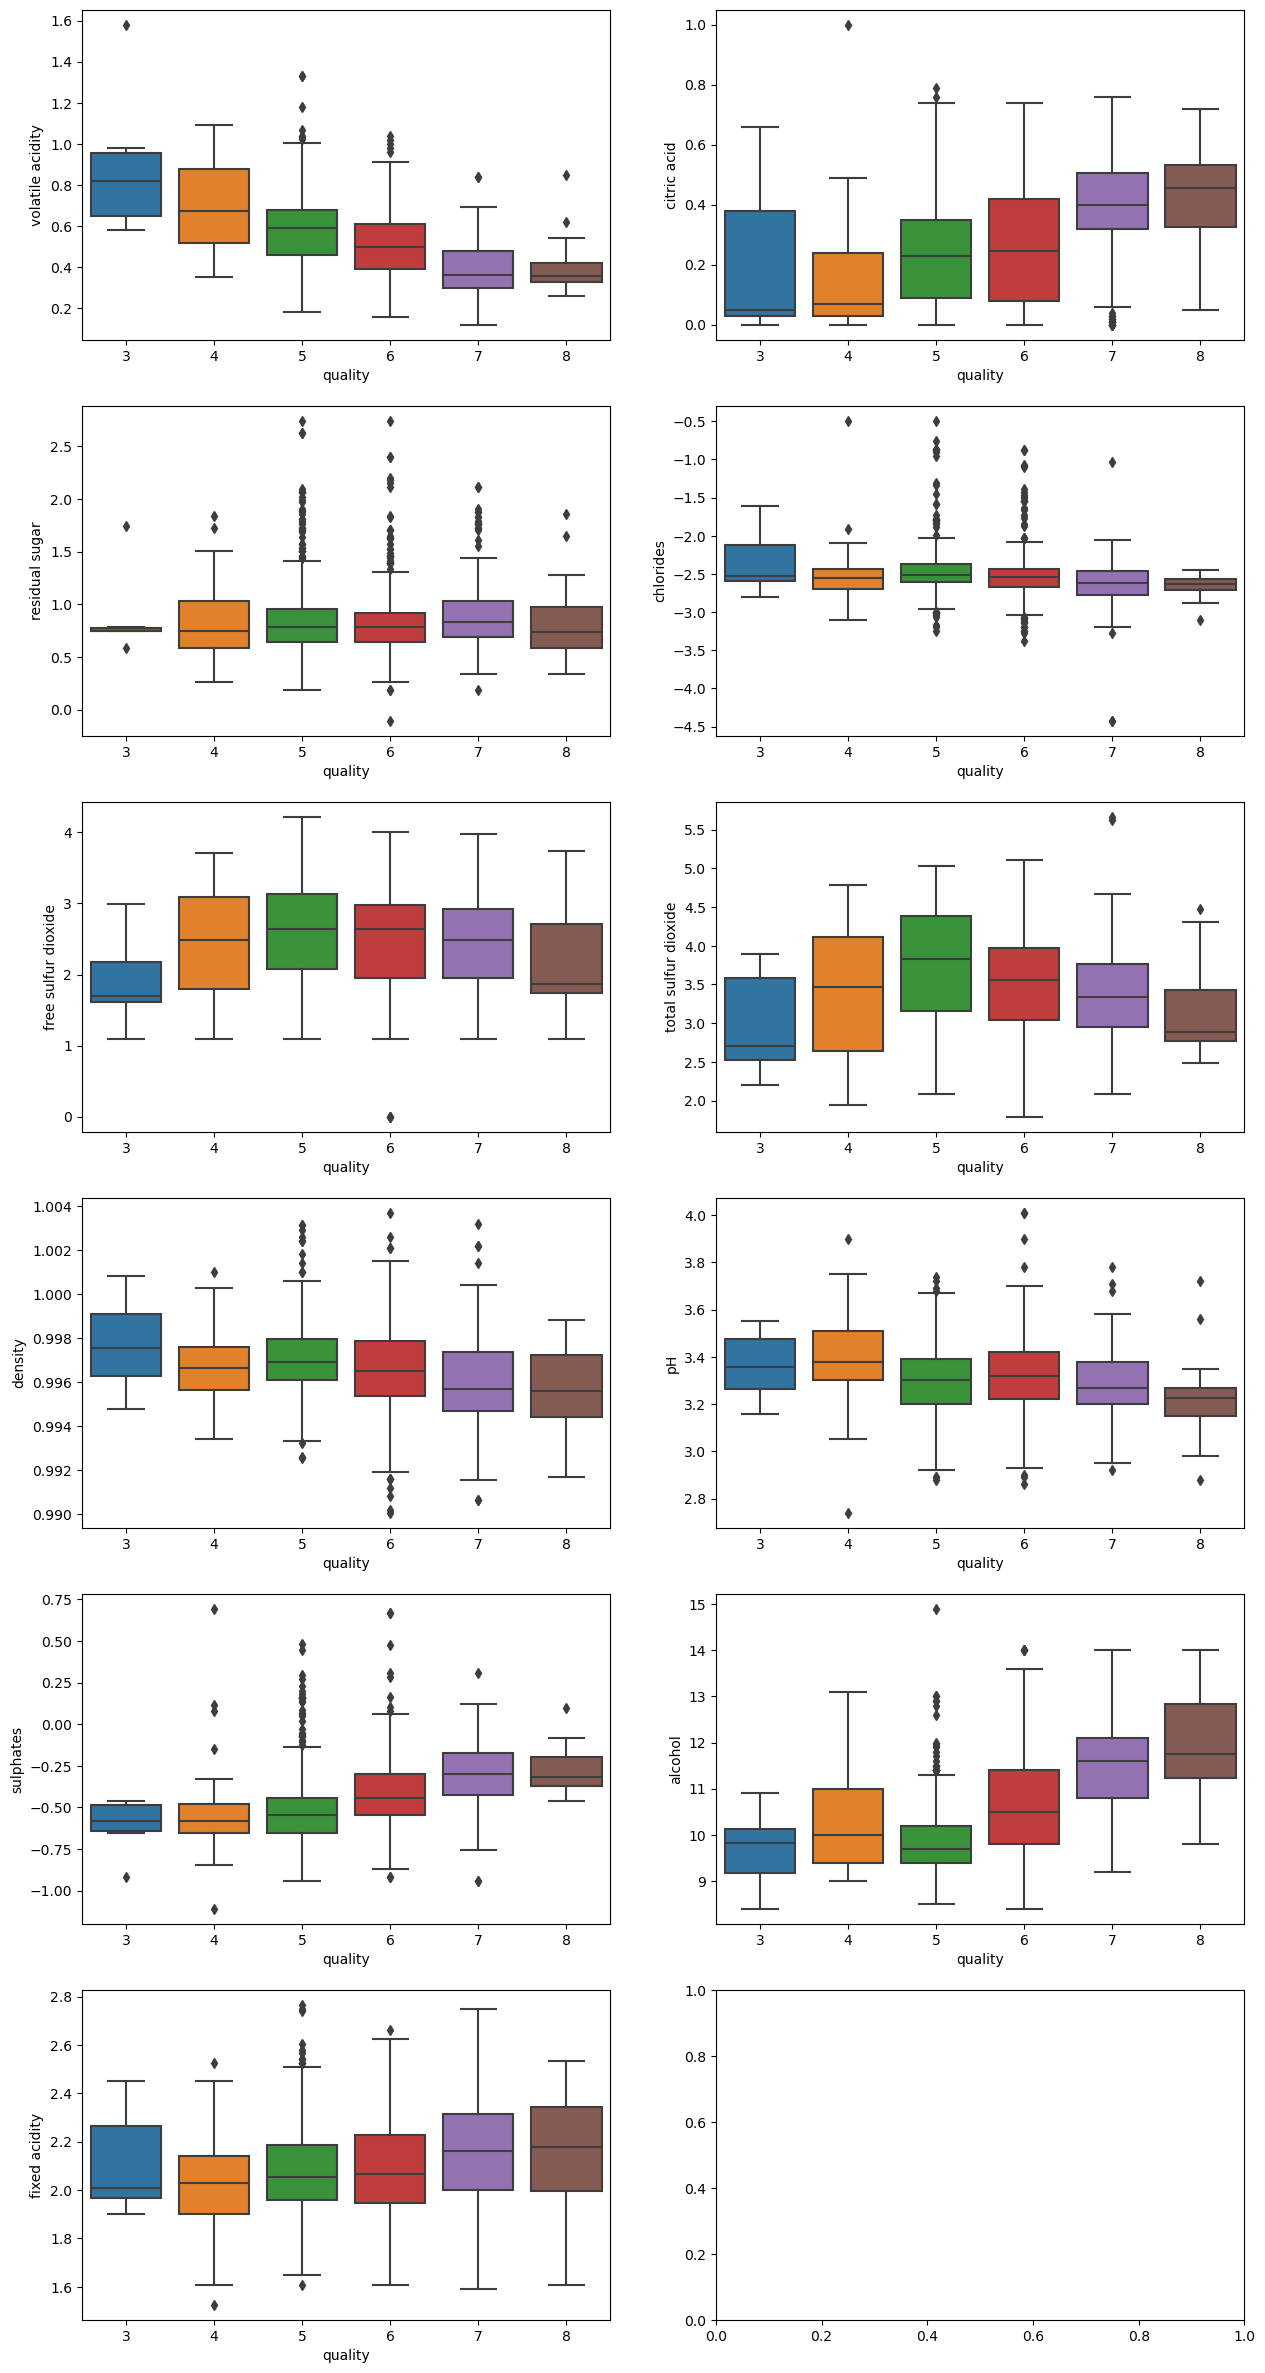

In [153]:
fig,ax=plt.subplots(6,2,figsize=(15,30))
sns.boxplot(x=data.quality,y=data['volatile acidity'],ax=ax[0][0])
sns.boxplot(x=data.quality,y=data['citric acid'],ax=ax[0][1])
sns.boxplot(x=data.quality,y=data['residual sugar'],ax=ax[1][0])
sns.boxplot(x=data.quality,y=data['chlorides'],ax=ax[1][1])
sns.boxplot(x=data.quality,y=data['free sulfur dioxide'],ax=ax[2][0])
sns.boxplot(x=data.quality,y=data['total sulfur dioxide'],ax=ax[2][1])
sns.boxplot(x=data.quality,y=data['density'],ax=ax[3][0])
sns.boxplot(x=data.quality,y=data['pH'],ax=ax[3][1])
sns.boxplot(x=data.quality,y=data['sulphates'],ax=ax[4][0])
sns.boxplot(x=data.quality,y=data['alcohol'],ax=ax[4][1])
sns.boxplot(x=data.quality,y=data['fixed acidity'],ax=ax[5][0])

In [154]:
X=data.drop('quality', axis=1)
y=data['quality']

In [155]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify = y,random_state=42)

In [161]:
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
pred_prob = RandomForest.predict_proba(X_test)

print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred,average='weighted'))
print(roc_auc_score(y_test, pred_prob, multi_class='ovo'))
print(classification_report(y_test,y_pred))

0.7117903930131004
0.6896786389891422
0.9990130671041505
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.74      0.85      0.79        97
           6       0.68      0.73      0.71        92
           7       0.70      0.48      0.57        29
           8       0.00      0.00      0.00         3

    accuracy                           0.71       229
   macro avg       0.35      0.34      0.34       229
weighted avg       0.68      0.71      0.69       229



In [125]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [126]:
print('Original class distribution:')
print(y.value_counts())

Original class distribution:
5    483
6    483
7    483
4    483
8    483
3    483
Name: quality, dtype: int64


<AxesSubplot:xlabel='quality', ylabel='count'>

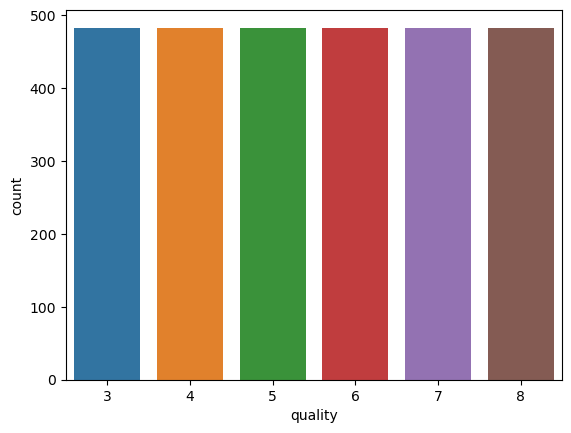

In [127]:
sns.countplot(y)

In [128]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.20, random_state=42)

In [129]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X_train, y_train):
    cv = KFold(n_splits=4, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train, y_train, scoring='roc_auc_ovo', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [130]:
RandomForest = RandomForestClassifier(n_estimators=200,max_depth=15,random_state=42)
scores=evaluate_model(RandomForest,X_train, y_train)
print('Random Forest Classifier Accuracy : ', np.mean(scores))

Random Forest Classifier Accuracy :  0.9740816036298596


In [131]:
RandomForest.fit(X_train,y_train)
y_pred = RandomForest.predict(X_test)

In [97]:
pred_prob = RandomForest.predict_proba(X_test)
roc_auc_score(y_test, pred_prob, multi_class='ovo')

0.9831431340008746

In [98]:
accuracy_score(y_test, y_pred)

0.8706896551724138

In [99]:
 f1_score(y_test, y_pred, average='weighted')

0.8668189405673488

In [100]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.99      1.00      0.99        97
           4       0.95      0.97      0.96        92
           5       0.79      0.68      0.73       108
           6       0.66      0.62      0.64        95
           7       0.83      0.99      0.90        96
           8       1.00      1.00      1.00        92

    accuracy                           0.87       580
   macro avg       0.87      0.88      0.87       580
weighted avg       0.87      0.87      0.87       580

